# Importing Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image

In [4]:
import random
random.seed(42) # reproducbility

# Reading the Dataset

In [5]:
df = pd.read_csv('../input/movie-classifier/Multi_Label_dataset/train.csv')

In [6]:
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(2300)

In [7]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.describe()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.0,2300.0,2300.0,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,0.199130,0.123043,0.021739,0.046087,0.442174,0.196957,0.020870,0.519130,0.060000,0.075217,...,0.0,0.0,0.0,0.183913,0.062609,0.000435,0.027826,0.130000,0.020870,0.009130
std,0.399433,0.328559,0.145862,0.209719,0.496753,0.397786,0.142979,0.499743,0.237538,0.263799,...,0.0,0.0,0.0,0.387498,0.242310,0.020851,0.164510,0.336377,0.142979,0.095137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.drop(['News', 'Reality-TV', 'N/A'],axis=1, inplace=True)

In [10]:
import ast

# Convert string representation of lists into actual lists
df['Genre'] = df['Genre'].apply(ast.literal_eval) #converting string rep into actual lists

all_genres = set(genre for genres in df['Genre'] for genre in genres)#new binary columns for each genre

for genre in all_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)


In [11]:
genre_columns = df.columns[2:]
genre_counts = df[genre_columns].sum().sort_values(ascending=False)
genre_percentages = (genre_counts / sum(genre_counts)) * 100

print(genre_counts)
print(genre_percentages)

Drama          1194
Comedy         1017
Action          458
Crime           453
Romance         423
Thriller        299
Adventure       283
Horror          196
Fantasy         173
Sci-Fi          144
Mystery         140
Family          138
Music           106
Biography       106
Sport            64
History          55
Animation        50
Documentary      48
War              48
Musical          26
Western          21
Short             1
dtype: int64
Drama          21.936432
Comedy         18.684549
Action          8.414477
Crime           8.322616
Romance         7.771450
Thriller        5.493294
Adventure       5.199339
Horror          3.600955
Fantasy         3.178394
Sci-Fi          2.645600
Mystery         2.572111
Family          2.535367
Music           1.947455
Biography       1.947455
Sport           1.175822
History         1.010472
Animation       0.918611
Documentary     0.881867
War             0.881867
Musical         0.477678
Western         0.385817
Short           0.0183

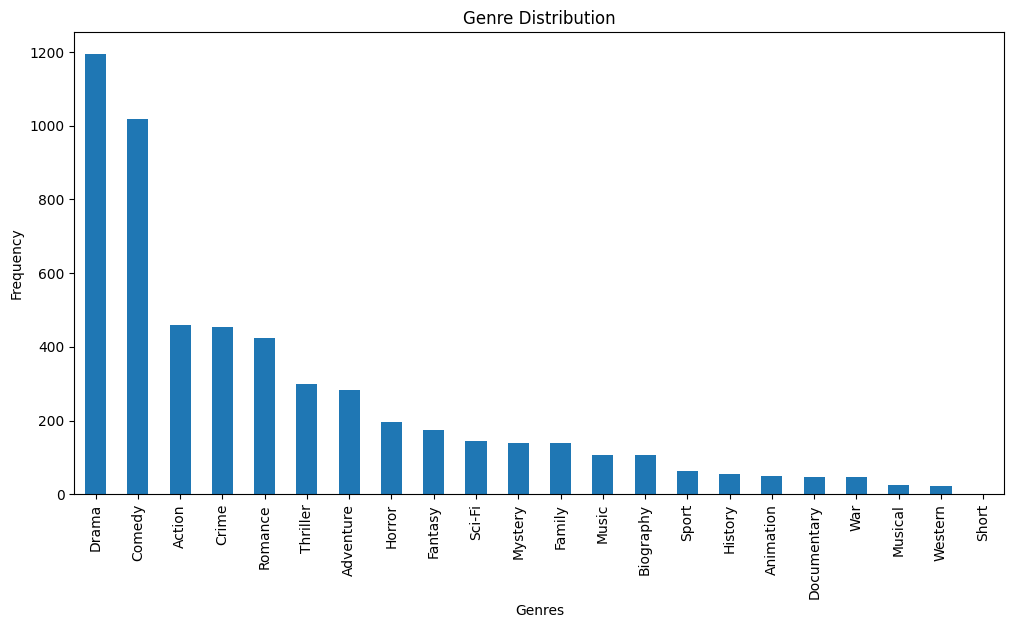

In [12]:
import matplotlib.pyplot as plt

genre_counts.plot(kind='bar', figsize=(12, 6), title="Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()


In [13]:
genres_to_keep = genre_counts[genre_counts >= 400].index.tolist()

df_reduced = df[['Id'] + genres_to_keep]
print(df_reduced)

             Id  Drama  Comedy  Action  Crime  Romance
0     tt0086425      1       1       0      0        0
1     tt0085549      1       0       0      0        1
2     tt0086465      0       1       0      0        0
3     tt0086567      0       0       0      0        0
4     tt0086034      0       0       1      0        0
...         ...    ...     ...     ...    ...      ...
2295  tt0116130      0       1       0      0        0
2296  tt0116225      0       0       1      0        0
2297  tt0116329      1       0       0      0        0
2298  tt0116778      0       1       0      0        0
2299  tt0115963      1       0       0      0        0

[2300 rows x 6 columns]


Index(['Drama', 'Comedy', 'Action', 'Crime', 'Romance'], dtype='object')


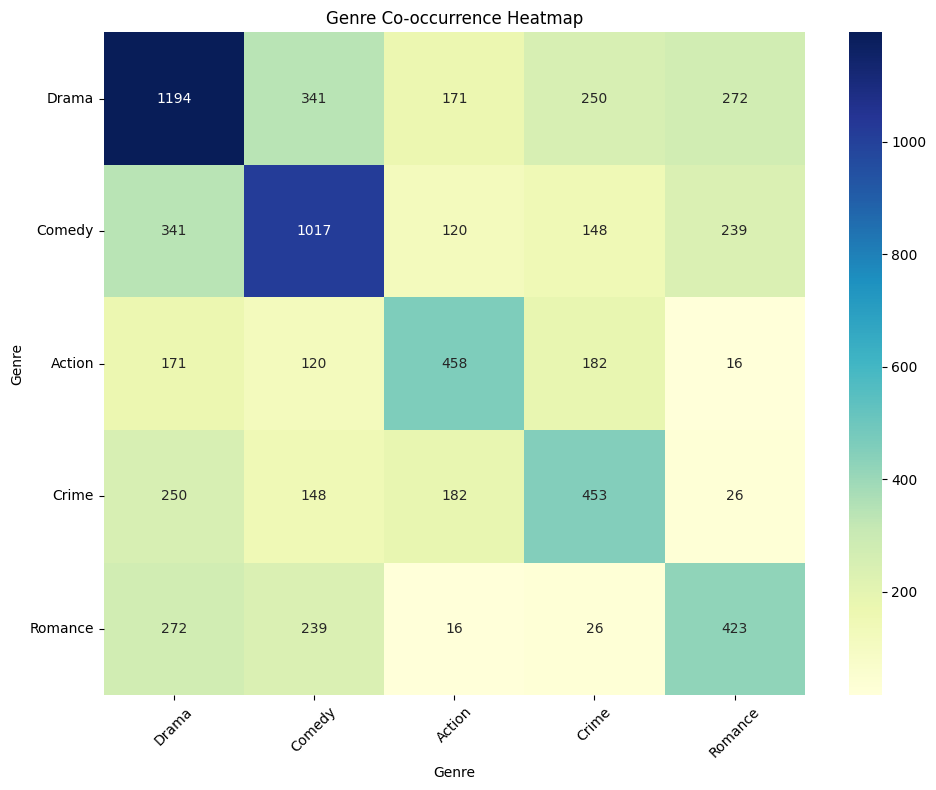

In [14]:
import pandas as pd
import numpy as np
genre_columns = df_reduced.columns[1:]
print(genre_columns)
genre_data = df_reduced[genre_columns]

genre_data = genre_data.apply(pd.to_numeric)

genre_matrix = np.dot(genre_data.T, genre_data)

genre_matrix = pd.DataFrame(genre_matrix, index=genres_to_keep, columns=genres_to_keep)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(genre_matrix, annot=True, fmt="d", cmap='YlGnBu', 
            xticklabels=genre_columns, yticklabels=genre_columns)

plt.title('Genre Co-occurrence Heatmap')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
#ONLY KEEP Id, Drama and Action
df_reduced = df_reduced[['Id', 'Drama', 'Action']]
#remove the images where drama and acion is both equal to 1 or 0
df_filtered = df_reduced[(df_reduced['Drama'] != df_reduced['Action'])] 
df_filtered = df_filtered.reset_index(drop=True)

print(df_filtered)

             Id  Drama  Action
0     tt0086425      1       0
1     tt0085549      1       0
2     tt0086034      0       1
3     tt0086383      0       1
4     tt0086361      1       0
...         ...    ...     ...
1305  tt0117887      1       0
1306  tt0116367      0       1
1307  tt0116225      0       1
1308  tt0116329      1       0
1309  tt0115963      1       0

[1310 rows x 3 columns]


In [16]:
width = 350
height = 350
X = []

for i in tqdm(range(df_filtered.shape[0])):
    path = '../input/movie-classifier/Multi_Label_dataset/Images/' + df_filtered['Id'][i] + '.jpg'
    img = Image.open(path).resize((width, height))  # open and resize image
    img = np.array(img)  # convert image to numpy array
    img = img / 255.0  # normalize
    X.append(img)

X = np.array(X)


y = df_filtered.drop(['Id'],axis=1)
y = y.to_numpy()
print(y.shape)

100%|██████████| 1310/1310 [00:16<00:00, 79.83it/s]


(1310, 2)


    Sample ID   Genre    Mean R    Mean G    Mean B
0   tt0104283   Drama  0.633576  0.545438  0.586906
1   tt0088683   Drama  0.556729  0.328491  0.272701
2   tt0086510   Drama  0.826981  0.586982  0.381628
3   tt0107745   Drama  0.440263  0.488047  0.498912
4   tt0093067   Drama  0.373571  0.291199  0.279770
5   tt0093073   Drama  0.475069  0.420114  0.429536
6   tt0093389   Drama  0.250325  0.192245  0.059384
7   tt0089160   Drama  0.208813  0.092945  0.070391
8   tt0107611   Drama  0.836312  0.637549  0.590452
9   tt0088939   Drama  0.275916  0.216397  0.225202
10  tt0104225   Drama  0.595478  0.494298  0.335618
11  tt0107156   Drama  0.769255  0.729108  0.741943
12  tt0113117   Drama  0.705304  0.601344  0.501268
13  tt0102573   Drama  0.449073  0.273127  0.192238
14  tt0087197   Drama  0.126919  0.091082  0.074287
15  tt0105812   Drama  0.570137  0.495316  0.478109
16  tt0098575   Drama  0.683616  0.604022  0.650971
17  tt0086405   Drama  0.769493  0.733437  0.741329
18  tt008622

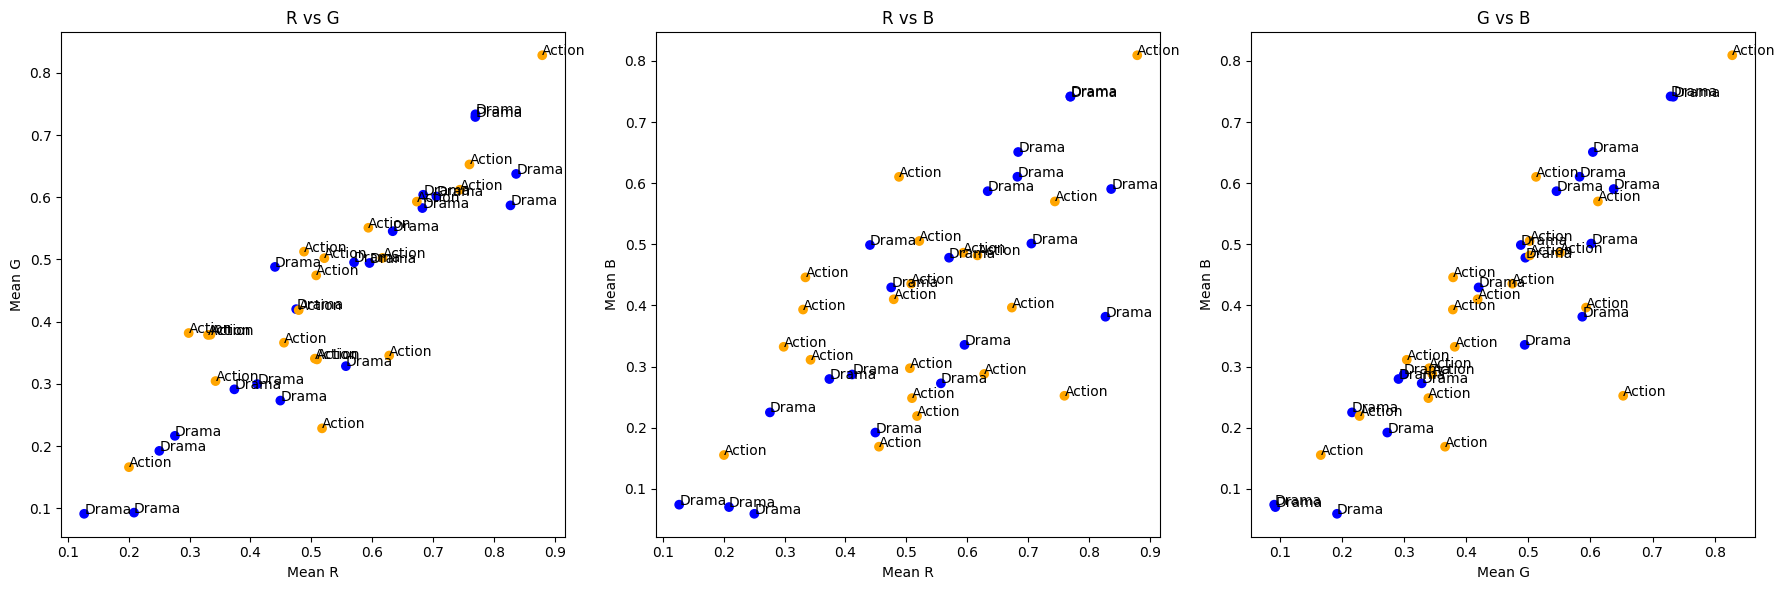

In [17]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# this is GPT generated
width, height = 350, 350

# Function to process an image and compute mean RGB values
def process_image(image_path):
    img = Image.open(image_path).resize((width, height))
    img = np.array(img)
    img = img / 255.0  # Normalize
    r_mean, g_mean, b_mean = np.mean(img, axis=(0, 1))
    return [r_mean, g_mean, b_mean]

selected_samples = []
for genre in ['Drama', 'Action']:
    genre_samples = df_filtered[df_filtered[genre] == 1]['Id'].tolist()
    selected_samples += [(img_id, genre) for img_id in random.sample(genre_samples, 20)]

mean_rgb_values = []
for img_id, genre in selected_samples:
    path = f'../input/movie-classifier/Multi_Label_dataset/Images/{img_id}.jpg'
    values = process_image(path)
    if values:
        mean_rgb_values.append([img_id, genre] + values)

# Create a DataFrame for visualization
mean_rgb_df = pd.DataFrame(mean_rgb_values, columns=['Sample ID', 'Genre', 'Mean R', 'Mean G', 'Mean B'])

# Display the DataFrame
print(mean_rgb_df)

# Plotting RGB combinations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define colors for each class
colors = {'Drama': 'blue', 'Action': 'orange'}

# Plot R vs G
axes[0].scatter(mean_rgb_df['Mean R'], mean_rgb_df['Mean G'], 
                c=mean_rgb_df['Genre'].map(colors), label=mean_rgb_df['Genre'])
for i in range(len(mean_rgb_df)):
    axes[0].annotate(mean_rgb_df.loc[i, 'Genre'], 
                     (mean_rgb_df.loc[i, 'Mean R'], mean_rgb_df.loc[i, 'Mean G']))
axes[0].set_xlabel('Mean R')
axes[0].set_ylabel('Mean G')
axes[0].set_title('R vs G')

# Plot R vs B
axes[1].scatter(mean_rgb_df['Mean R'], mean_rgb_df['Mean B'], 
                c=mean_rgb_df['Genre'].map(colors), label=mean_rgb_df['Genre'])
for i in range(len(mean_rgb_df)):
    axes[1].annotate(mean_rgb_df.loc[i, 'Genre'], 
                     (mean_rgb_df.loc[i, 'Mean R'], mean_rgb_df.loc[i, 'Mean B']))
axes[1].set_xlabel('Mean R')
axes[1].set_ylabel('Mean B')
axes[1].set_title('R vs B')


axes[2].scatter(mean_rgb_df['Mean G'], mean_rgb_df['Mean B'], 
                c=mean_rgb_df['Genre'].map(colors), label=mean_rgb_df['Genre'])
for i in range(len(mean_rgb_df)):
    axes[2].annotate(mean_rgb_df.loc[i, 'Genre'], 
                     (mean_rgb_df.loc[i, 'Mean G'], mean_rgb_df.loc[i, 'Mean B']))
axes[2].set_xlabel('Mean G')
axes[2].set_ylabel('Mean B')
axes[2].set_title('G vs B')

plt.tight_layout()
plt.show()


# Selecting the feature

In [18]:
rgb_features = []
for img in X:
    r_mean, g_mean, b_mean = np.mean(img, axis=(0, 1))
    rgb_features.append([r_mean, b_mean]) 
rgb_features = np.array(rgb_features)

# Applying K-fold cross validation

In [19]:
# 5-Fold Cross-Validation Simulation
from sklearn.neighbors import KNeighborsClassifier

scores = []
for n in range (2,20):
    for fold in range(5):
        print(f"Fold {fold + 1}")
        
        # Perform train-test split with varying random_state to simulate folds
        X_train, X_test, y_train, y_test = train_test_split(
            rgb_features, y, test_size=0.2, random_state=fold * 42
        )
        
        knn = KNeighborsClassifier(n_neighbors=n)  # Adjust `n_neighbors` as needed
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
    print(f"KNeighborsClassifier n = {n}")
    print(f"Average Accuracy across 5 folds: {np.mean(scores):.4f}")

Fold 1


NameError: name 'accuracy_score' is not defined

In [20]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(rgb_features):
    X_train, X_test = rgb_features[train_index], rgb_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Accuracy for this fold: {acc:.4f}")

print(f"Average Accuracy across 5 folds: {np.mean(scores):.4f}")

ValueError: y should be a 1d array, got an array of shape (1048, 2) instead.

In [21]:
##Define NN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Define CNN & parameters
    model = Sequential([
        Flatten(input_shape=(350, 350, 3)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(y.shape[1], activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=7, batch_size=8, validation_data=(X_test, y_test))
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int) #Establish treshold for binary classification
    
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc) 
    
    print("Accuracy for this fold: ")
    print(acc)

print("Average Accuracy across 5 folds: " + np.mean(scores))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.6675 - loss: 221.7420 - val_accuracy: 0.7748 - val_loss: 0.5757
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7946 - loss: 0.6981 - val_accuracy: 0.7748 - val_loss: 0.5412
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.7833 - loss: 0.5748 - val_accuracy: 0.7748 - val_loss: 0.5328
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.7776 - loss: 0.5904 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.7843 - loss: 0.5318 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7595 - loss: 0.5593 - val_accuracy: 0.7748 - val_loss: 0.5332
Epoch 7/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7718 - loss: 0.5377 - val_accuracy: 0.7748 - val_loss: 0.5332
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
Accuracy for this fold: 
0.7748091603053435


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.7485 - loss: 248.0413 - val_accuracy: 0.7748 - val_loss: 0.5981
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7730 - loss: 1.7238 - val_accuracy: 0.7748 - val_loss: 0.5395
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.7667 - loss: 0.7702 - val_accuracy: 0.7748 - val_loss: 0.5335
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7824 - loss: 0.7174 - val_accuracy: 0.7748 - val_loss: 0.5335
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7808 - loss: 0.5435 - val_accuracy: 0.7748 - val_loss: 0.5335
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7696 - loss: 0.5719 - val_accuracy: 0.7748 - val_loss: 0.5336
Epoch 7/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7769 - loss: 0.5310 - val_accuracy: 0.7748 - val_loss: 0.5336
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step
Accuracy for this fold: 
0.7748091603053435


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.6990 - loss: 213.2416 - val_accuracy: 0.7748 - val_loss: 0.6078
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7792 - loss: 5.8243 - val_accuracy: 0.7748 - val_loss: 0.5434
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7899 - loss: 0.7700 - val_accuracy: 0.7748 - val_loss: 0.5343
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.7842 - loss: 4.9902 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7650 - loss: 0.7643 - val_accuracy: 0.7748 - val_loss: 0.5337
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7780 - loss: 0.5711 - val_accuracy: 0.7748 - val_loss: 0.5336
Epoch 7/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.7619 - loss: 0.5573 - val_accuracy: 0.7748 - val_loss: 0.5338
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step
Accuracy for this fold: 
0.7748091603053435


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.7087 - loss: 299.5137 - val_accuracy: 0.7748 - val_loss: 0.5567
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.7731 - loss: 1.3897 - val_accuracy: 0.7748 - val_loss: 0.5343
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.7733 - loss: 4.0961 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7905 - loss: 2.7506 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7556 - loss: 0.5579 - val_accuracy: 0.7748 - val_loss: 0.5337
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7763 - loss: 0.5341 - val_accuracy: 0.7748 - val_loss: 0.5339
Epoch 7/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8001 - loss: 0.5130 - val_accuracy: 0.7748 - val_loss: 0.5334
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
Accuracy for this fold: 
0.7748091603053435


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.6426 - loss: 330.3263 - val_accuracy: 0.7748 - val_loss: 0.5854
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.7353 - loss: 1.3592 - val_accuracy: 0.7748 - val_loss: 0.5411
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.7759 - loss: 0.5653 - val_accuracy: 0.7748 - val_loss: 0.5334
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.7867 - loss: 0.5547 - val_accuracy: 0.7748 - val_loss: 0.5329
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8033 - loss: 0.6418 - val_accuracy: 0.7748 - val_loss: 0.5315
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.7886 - loss: 0.5454 - val_accuracy: 0.7748 - val_loss: 0.5320
Epoch 7/7
 63/131 ━━━━━━━━━━━━━━━━━━━━ 2:08 2s/step - accuracy: 0.7983 - loss: 0.5063


KeyboardInterrupt



In [23]:
##Define NN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = rgb_features[train_index], rgb_features[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #Define CNN & parameters
    model = Sequential([
        # Flatten(input_shape=(350, 350, 3)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(y.shape[1], activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=7, batch_size=8, validation_data=(X_test, y_test))
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int) #Establish treshold for binary classification
    
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc) 
    
    print("Accuracy for this fold: ")
    print(acc)

print("Average Accuracy across 5 folds: " + np.mean(scores))

Epoch 1/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7835 - loss: 0.6091 - val_accuracy: 0.7748 - val_loss: 0.5444
Epoch 2/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8169 - loss: 0.4991 - val_accuracy: 0.7748 - val_loss: 0.5449
Epoch 3/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7745 - loss: 0.5383 - val_accuracy: 0.7748 - val_loss: 0.5341
Epoch 4/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7735 - loss: 0.5410 - val_accuracy: 0.7748 - val_loss: 0.5342
Epoch 5/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7883 - loss: 0.5155 - val_accuracy: 0.7748 - val_loss: 0.5344
Epoch 6/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7736 - loss: 0.5342 - val_accuracy: 0.7748 - val_loss: 0.5325
Epoch 7/7
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7865 - loss: 0.5227 - val_accuracy: 0.7748 - val_loss: 0.5334
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy for this fold: 
0.7748091603053435
Epoch 1/7
131/131 ━━━━━━━━━━━

TypeError: can only concatenate str (not "numpy.float64") to str